   #             <font color=green>            Assignment 2 </font>
#           <font color=green>  MLP & CNN </font>

### Names:
### احمد صبري علي.........................................  stdcode: 9190360
### احمد طارق احمد.........................................   stdcode: 9190287
### احمد عبدالجليل محمود.................................   stdcode: 9190454
### طه عبدالفتاح  كمال......................................   stdcode: 9190459
### يوسف خالد السيد.......................................    stdcode: 9190827

#           <font color=blue>  Quistion 1 </font>

#### Use the ReducedMNIST which is a reduced version of the MNIST data set.
#### •	ReducedMNIST training: 1000 examples for each digit.
#### •	ReducedMNIST test: 200 examples for each digit.


In [188]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module |
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
import cv2
from tqdm import tqdm
from torch.utils.data import DataLoader # for dataloaders 
import torchvision.transforms as transforms
import torchvision
from sklearn.decomposition import PCA


### 1.	Use multilayer perceptron (MLP) (it is also called Feedforward neural network (FFNN)) with 1, 2, or 3 hidden layers to solve this problem. You may use any of the features used in assignment 1. You are free to use any hyper-parameters of your own choice.

In [189]:
DATADIR = "C:/Users/Ahmed/AnacondaWorkSpace/drmohsen1/Reduced MNIST Data/Reduced Trainging data/"

CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]
training_data = []
Labels = []

def create_training_data():
    i=0
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
                training_data.append(img_array)  # add this to our training_data
                zero_list=np.zeros(10)
                zero_list[i]=1
                Labels.append(zero_list)
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        i=i+1

create_training_data()
#

100%|██████████| 1000/1000 [00:00<00:00, 7536.57it/s]


In [190]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR = "C:/Users/Ahmed/AnacondaWorkSpace/drmohsen1/Reduced MNIST Data/Reduced Testing data/"
test_data=[]
CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]

Labels_test = []
def create_training_data():
    i=0
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
                test_data.append(img_array)  # add this to our training_data
                zero_list=np.zeros(10)
                zero_list[i]=1
                Labels_test.append(zero_list)
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        i=i+1

create_training_data()
#
print(len(test_data))

100%|██████████| 200/200 [00:00<00:00, 7713.24it/s]

2000



DCT

In [191]:
training_dct=[]
for image in training_data:
    # Load an image in grayscale
    dct = cv2.dct(np.float32(image))
    dct = dct.reshape(-1,1)
    # Compute the 2D DCT of the image
    dct_features=dct.tolist()[:200]
    training_dct.append(dct_features)
training_dct=np.squeeze(np.array(training_dct))

In [192]:
import cv2
import numpy as np 
test_dct=[]
for image in test_data:
    # Load an image in grayscale
    dct = cv2.dct(np.float32(image))
    dct = dct.reshape(-1,1)
    # Compute the 2D DCT of the image
    dct_features=dct.tolist()[:200]
    dct_features=np.array(dct_features)
    test_dct.append(dct_features)
test_dct=np.squeeze(np.array(test_dct))
#print(test_dct)

PCA

In [193]:
X = np.array(training_data)
# Flatten each image into a 1D array
X_flat = X.reshape(X.shape[0], -1)
pca = PCA(745) # we need 2 principal components.  784
converted_data2_train = pca.fit_transform(X_flat)
#limt:converted_data2<6526.3
converted_data2_train.shape

(10000, 745)

In [194]:
X = np.array(test_data)
# Flatten each image into a 1D array
X_flat = X.reshape(X.shape[0], -1)
pca = PCA(745) # we need 2 principal components.  784
converted_data2_test = pca.fit_transform(X_flat)
#limt:converted_data2<6526.3
converted_data2_test.shape

(2000, 745)

A feature of your creation

In [195]:

def calculate_centriods(photo, r, c):
    centroids = []     
    binary_image = 1 * (127 < photo) & (photo < 255)
    for row in range(0, photo.shape[0] - r, r):
        for col in range(0, photo.shape[1] - c, c):
            filter = binary_image[row:row + r, col:col + c]
            x_center, y_center = np.argwhere(filter == 1).sum(0) / np.count_nonzero(filter)
            centroids.append(x_center)
            centroids.append(y_center)

    centroids = np.nan_to_num(centroids)
    return centroids



training_MYfeature=[]
for img in training_data:
    centroid = calculate_centriods(img,4,4)
    training_MYfeature.append(centroid)

testing_MYfeature=[]
for img in test_data:
    centroid = calculate_centriods(img,4,4)
    testing_MYfeature.append(centroid)
training_MYfeature=np.array(training_MYfeature)
testing_MYfeature=np.array(testing_MYfeature)
print(testing_MYfeature.shape)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11216\1677808676.py:7: RuntimeWarning: invalid value encountered in divide
  x_center, y_center = np.argwhere(filter == 1).sum(0) / np.count_nonzero(filter)


(2000, 72)


Now let's choose which feature ,we would pass to the nural network 

In [252]:
training=training_MYfeature
testing=testing_MYfeature

In [253]:
train_data = []
for i in range(len(training)):
    train_data.append([training[i], Labels[i]])
print(len(train_data))
test_data = []
for i in range(len(testing)):
    test_data.append([testing[i], Labels_test[i]])
print(len(test_data))

10000
2000


In [254]:
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device :",device)

device : cuda


In [255]:
batch_size=64
train_dl=DataLoader(train_data, batch_size, shuffle=True) 
test_dl =DataLoader(test_data ,batch_size , shuffle=True)

In [256]:
class FFNN_1hiddenlayer  (nn.Module):
    def __init__(self,input_feacher_len):
        super().__init__()
        #self.L1=nn.Linear(200,200)
        #self.L2=nn.Linear(300,200)
        self.L3=nn.Linear(input_feacher_len,10)
    def forward(self,xb):
        #out=self.L1(xb)
        #out=nn.functional.relu(out)
        #out=self.L2(out)
        #out=nn.functional.relu(out)
        out=self.L3(xb)
        return out


class FFNN_2hiddenlayer  (nn.Module):
    def __init__(self,input_feacher_len):
        super().__init__()
        self.L1=nn.Linear(input_feacher_len,200)
        #self.L2=nn.Linear(300,200)
        self.L3=nn.Linear(200,10)
    def forward(self,xb):
        out=self.L1(xb)
        out=nn.functional.relu(out)
        #out=self.L2(out)
        #out=nn.functional.relu(out)
        out=self.L3(out)
        return out




class FFNN_3hiddenlayer  (nn.Module):
    def __init__(self,input_feacher_len):
        super().__init__()
        self.L1=nn.Linear(input_feacher_len,300)
        self.L2=nn.Linear(300,200)
        self.L3=nn.Linear(200,10)
    def forward(self,xb):
        out=self.L1(xb)
        out=nn.functional.relu(out)
        out=self.L2(out)
        out=nn.functional.relu(out)
        out=self.L3(out)
        return out
input_feacher_len=72
MLP_model =FFNN_3hiddenlayer(input_feacher_len).to(device=device) 




In [257]:
learning_rate=0.001
#Loss Function
loss_function=nn.CrossEntropyLoss()
#Optimizer
optimizer= torch.optim.Adam(MLP_model.parameters(),lr=learning_rate)

In [258]:
def check_accuracy(loader,model):
    num_correct=0
    num_samples=0
    model.eval()  # to turn off batch normalisation and dropout layers

    with torch.no_grad():  # to turn off backprobagation
        for x, y in tqdm(loader):
            x=x.to(device=device)
            #x=F.pad(input=x,pad=(2,2,2,2)).to(device=device) # make the image 32x32 dimension instead of 28x28

            y=torch.tensor(y).to(device=device)

            x = x.float() 


            scores=model(x)
            _, predictions=scores.max(1)  #max return a tuple (max element, max element index)

            y=torch.argmax(y, dim=1)

            num_correct+= (predictions==y).sum()
            num_samples+= predictions.size(0)
        #print('accuracy=',((float(num_correct)/num_samples)*100) )

    model.train()   # to return model back to training mode
    return (float(num_correct)/num_samples)*100

In [260]:
%%time
#Network training
num_epochs=3
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs}')
    for batch_idx, (data,targets) in enumerate(tqdm(train_dl)):
        data=data.to(device=device)
        targets=targets.to(device=device)
        data = data.float() 
        targets = targets.long()
        scores=MLP_model(data)
        #forward
        target_data=torch.argmax(targets, dim=1)
        loss=loss_function(scores,target_data)
        torch.set_grad_enabled(True)
        #backward
        optimizer.zero_grad()
        loss.backward()
        #optimazer step
        optimizer.step()
    print("validation accuracy= ",check_accuracy(loader=test_dl,model=MLP_model))
#print("validation accuracy= ",check_accuracy(loader=test_dl,model=model))

epoch: 1/3


  0%|          | 0/32 [00:00<?, ?it/s]C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11216\3980923994.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y).to(device=device)
100%|██████████| 32/32 [00:00<00:00, 1106.58it/s]


validation accuracy=  91.95
epoch: 2/3


100%|██████████| 32/32 [00:00<00:00, 1033.60it/s]


validation accuracy=  91.8
epoch: 3/3


100%|██████████| 32/32 [00:00<00:00, 916.74it/s]

validation accuracy=  91.85
Wall time: 1.05 s


In [266]:
%%time
img=training_data[5103]
# Load an image in grayscale
dct = cv2.dct(np.float32(img))
dct = dct.reshape(-1,1)
# Compute the 2D DCT of the image
dct_features=dct.tolist()[:200]
dct_features=np.squeeze(np.array(dct_features))
dct_features=dct_features.reshape(1,200)
dct_features=torch.from_numpy(dct_features).to(device=device)
yb=MLP_model(dct_features.float() )
_, preds  = torch.max(yb, dim=1)
preds


Wall time: 2.12 ms


tensor([7], device='cuda:0')

#           <font color=blue>  Quistion 2 </font>

##
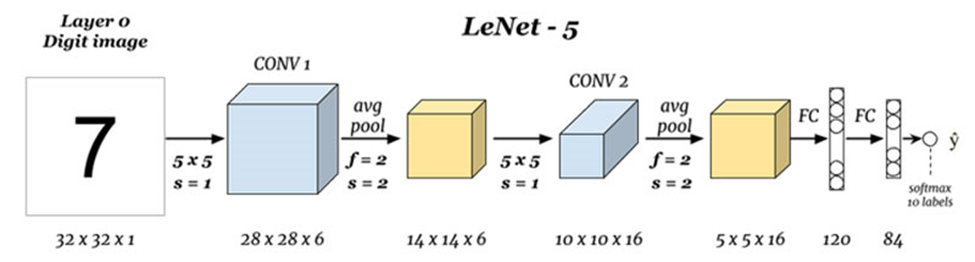

# 2.	a. Use the ReducedMNIST data to train a CNN from the images without any use of a feature extraction step. Use the following structure to start with. 
## (Hint: you have to adjust your parameters to fit 28x28 images instead of 32x32, and use ReLU function as an activation function).


In [133]:
batch_size=128

In [134]:
train_dir="C:/Users/Ahmed/AnacondaWorkSpace/drmohsen1/Reduced MNIST Data/Reduced Trainging data/"
valid_dir= "C:/Users/Ahmed/AnacondaWorkSpace/drmohsen1/Reduced MNIST Data/Reduced Testing data/"
image_size=256
#transform = T.Resize((image_size,image_size))
# datasets for validation and training
train = torchvision.datasets.ImageFolder(train_dir, transform=transforms.Compose([
            transforms.Grayscale(), 
            transforms.ToTensor(),
        ]))
valid = torchvision.datasets.ImageFolder(valid_dir, transform=transforms.Compose([
            transforms.Grayscale(), 
            transforms.ToTensor(),
        ]))
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, pin_memory=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: ',device)

device:  cuda


In [135]:
class LeNet5(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels, 6, kernel_size=5, padding=0,stride=1)
        self.pool =  nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, padding=0,stride=1)
        self.L0= nn.Flatten()
        self.L1=nn.Linear(256, 120)
        self.ACT1= nn.ReLU(inplace=True)
        self.L2=nn.Linear(120, 84)
        self.ACT2= nn.ReLU(inplace=True)
        self.L3= nn.Linear(84, num_classes)
        self.ACT3= nn.Softmax()
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4*4*16, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.Linear(84, num_classes),
            #nn.Softmax()
        )
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.pool(out)
        out = self.conv2(out)
        out = self.pool(out)
        out = self.classifier(out)
        
        #out = self.L0(out)
        #out = self.L1(out)
        #out = self.ACT1(out)
        #out = self.L2(out)
        #out = self.ACT2(out)
        #out = self.L3(out)
        #out = self.ACT3(out)
        
        return out 
model = LeNet5(1,10).to(device=device)
model

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (L0): Flatten(start_dim=1, end_dim=-1)
  (L1): Linear(in_features=256, out_features=120, bias=True)
  (ACT1): ReLU(inplace=True)
  (L2): Linear(in_features=120, out_features=84, bias=True)
  (ACT2): ReLU(inplace=True)
  (L3): Linear(in_features=84, out_features=10, bias=True)
  (ACT3): Softmax(dim=None)
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=120, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [136]:
# getting summary of the model
from torchsummary import summary 

INPUT_SHAPE = (1, 28, 28)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         AvgPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         AvgPool2d-4             [-1, 16, 4, 4]               0
           Flatten-5                  [-1, 256]               0
            Linear-6                  [-1, 120]          30,840
              ReLU-7                  [-1, 120]               0
            Linear-8                   [-1, 84]          10,164
            Linear-9                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.17
Estimated Total Size (MB): 0.22
---------------------------------------------

In [137]:
#Loss and Optimizer
learning_rate=0.01
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [138]:
def check_accuracy(loader,model):
    num_correct=0
    num_samples=0
    model.eval()  # to turn off batch normalisation and dropout layers

    with torch.no_grad():  # to turn off backprobagation
        for x, y in tqdm(loader):
            x=x.to(device=device)
            #x=F.pad(input=x,pad=(2,2,2,2)).to(device=device) # make the image 32x32 dimension instead of 28x28

            y=torch.tensor(y).to(device=device)

            scores=model(x)
            _, predictions=scores.max(1)  #max return a tuple (max element, max element index)
            num_correct+= (predictions==y).sum()
            num_samples+= predictions.size(0)
        #print('accuracy=',((float(num_correct)/num_samples)*100) )

    model.train()   # to return model back to training mode
    return (float(num_correct)/num_samples)*100

In [139]:
%%time
# Train Network
num_epochs=3
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs} ')
    for batch_idx, (data,targets) in enumerate(tqdm(train_dl)):

        #getting the data
        data=data.to(device=device)
        targets=targets.to(device=device)
        # data is the batch of data, targets is the target label of each sample in the batch


        #forward
        scores=model(data)
        loss=criterion(scores,targets)
        torch.set_grad_enabled(True)  # Context-manager 

        #backward
        optimizer.zero_grad()

        loss.backward()


        #gradient descent -- Adam
        optimizer.step()
    print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

epoch: 1/3 


  0%|          | 0/16 [00:00<?, ?it/s]C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11216\2298648362.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y).to(device=device)
100%|██████████| 16/16 [00:00<00:00, 23.02it/s]


validation accuracy= 92.85
epoch: 2/3 


100%|██████████| 16/16 [00:00<00:00, 23.18it/s]


validation accuracy= 93.7
epoch: 3/3 


100%|██████████| 16/16 [00:00<00:00, 24.05it/s]

validation accuracy= 95.15
Wall time: 13.6 s


In [140]:
%%time
print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

  0%|          | 0/16 [00:00<?, ?it/s]C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11216\2298648362.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y).to(device=device)
100%|██████████| 16/16 [00:00<00:00, 22.69it/s]

validation accuracy= 95.15
Wall time: 707 ms


In [141]:
validation accuracy= 94.85
Wall time: 42.4 s
    Wall time: 739 ms

SyntaxError: invalid syntax (2465522363.py, line 1)

## b.	Make some at least two variations in the hyper-parameters of your choice and check the network performance, then give your comments. These changes may be in the number of filters in any convolutional layer, the activation function, adding or removing any layer…etc.

### <font color=red>            Variation3   </font>

In [ ]:
class LeNet5_Variation3(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels, 6, kernel_size=5, padding=0,stride=1)
        self.pool =  nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, padding=0,stride=1)
        self.L0= nn.Flatten()
        self.L1=nn.Linear(256, 120)
        self.ACT1= nn.ReLU(inplace=True)
        self.L2=nn.Linear(120, 84)
        self.ACT2= nn.ReLU(inplace=True)
        self.L3= nn.Linear(84, num_classes)
        self.ACT3= nn.Softmax()
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4*4*16, 320),
            nn.ReLU(inplace=True),
            nn.Linear(320, 84),
            nn.Linear(84, num_classes),
            #nn.Softmax()
        )
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.pool(out)
        out = self.conv2(out)
        out = self.pool(out)
        out = self.classifier(out)
        
        #out = self.L0(out)
        #out = self.L1(out)
        #out = self.ACT1(out)
        #out = self.L2(out)
        #out = self.ACT2(out)
        #out = self.L3(out)
        #out = self.ACT3(out)
        
        return out 
model = LeNet5_Variation3(1,10).to(device=device)
model
learning_rate=0.01
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
# Train Network
num_epochs=3
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs} ')
    for batch_idx, (data,targets) in enumerate(tqdm(train_dl)):

        #getting the data
        data=data.to(device=device)
        targets=targets.to(device=device)
        # data is the batch of data, targets is the target label of each sample in the batch


        #forward
        scores=model(data)
        loss=criterion(scores,targets)
        torch.set_grad_enabled(True)  # Context-manager 

        #backward
        optimizer.zero_grad()

        loss.backward()


        #gradient descent -- Adam
        optimizer.step()
    print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

### <font color=red>            Variation 4   </font>

In [ ]:
%%time
class LeNet5_Variation4(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=5, padding=0,stride=1)
        self.pool =  nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(6, 32, kernel_size=5, padding=0,stride=1)
        self.L0= nn.Flatten()
        self.L1=nn.Linear(512, 120)
        self.ACT1= nn.ReLU(inplace=True)
        self.L2=nn.Linear(120, 84)
        self.ACT2= nn.ReLU(inplace=True)
        self.L3= nn.Linear(84, num_classes)
        self.ACT3= nn.Softmax()
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4*4*16, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.Linear(84, num_classes),
            #nn.Softmax()
        )
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.pool(out)
        out = self.conv2(out)
        out = self.pool(out)
        out = self.classifier(out)
        
        #out = self.L0(out)
        #out = self.L1(out)
        #out = self.ACT1(out)
        #out = self.L2(out)
        #out = self.ACT2(out)
        #out = self.L3(out)
        #out = self.ACT3(out)
        
        return out 
model = LeNet5_Variation3(1,10).to(device=device)
model
learning_rate=0.01
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
# Train Network
num_epochs=15
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs} ')
    for batch_idx, (data,targets) in enumerate(tqdm(train_dl)):

        #getting the data
        data=data.to(device=device)
        targets=targets.to(device=device)
        # data is the batch of data, targets is the target label of each sample in the batch


        #forward
        scores=model(data)
        loss=criterion(scores,targets)
        torch.set_grad_enabled(True)  # Context-manager 

        #backward
        optimizer.zero_grad()

        loss.backward()


        #gradient descent -- Adam
        optimizer.step()
    print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

In [ ]:
%%time
print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

#           <font color=blue>  Quistion 3 </font>

### 3.	Compare among the results that you have obtained in this assignment with that you have obtained in Assignment 3 regarding (fill the following table).

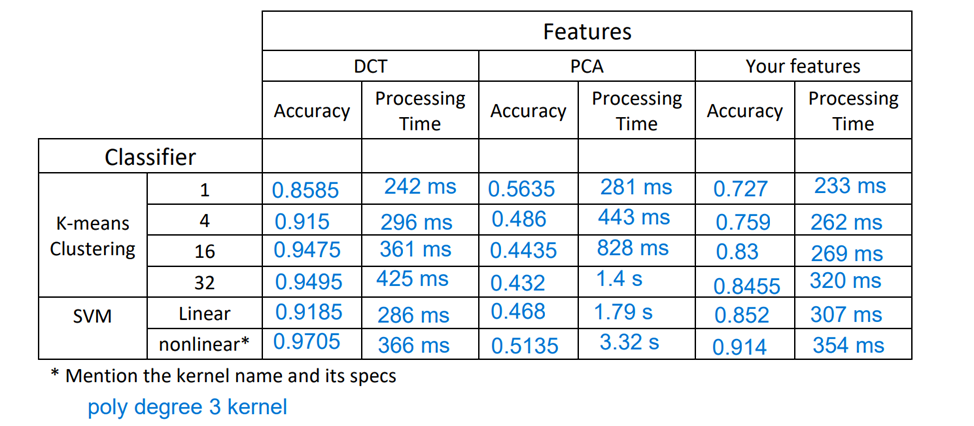

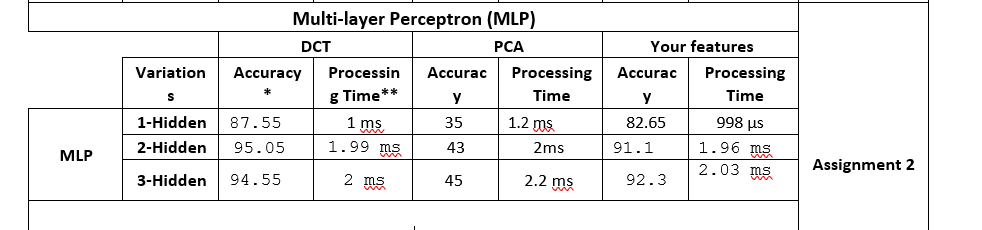

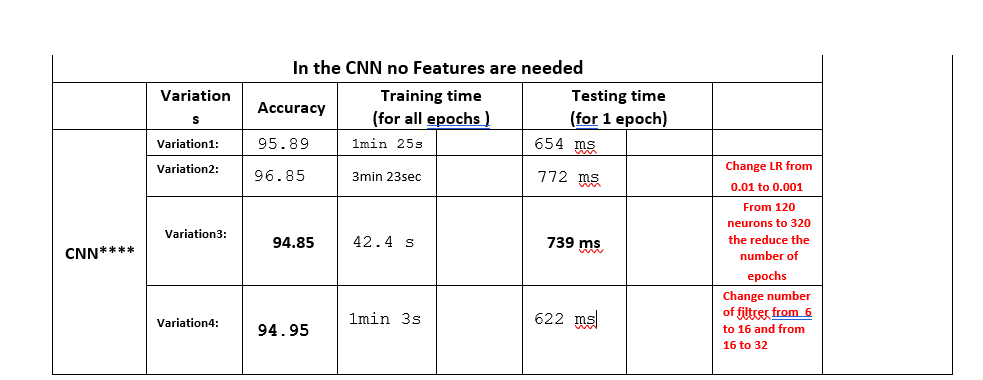

#           <font color=orange>  comments: </font>

#### -prossing time in nural networks is very small due to using GPUs
#### - reducing learning rate  lead to better results but need also more steps to reach the optimal point so we add more epoch to balance that.
#### -more layers will roughly leads to more accurecy but also more computintional cost.
#### - Increasing the number of epochs may lead to network overfitting
#### -we could reach better results by featchers created by CNN  that that we featchers we choose  
#### -SVM  with non-linear keranal proved to be great competitor Deep learning in this task
#### - in Variation 3 and 4 :Just making the neural network bigger doesn't necessarily make the results better
#### - we assumed that testing time means iterating over all the test data just 1 time
#### - we assumed that testing time means iterating over all the tran data just many time (multible epochs)

#           <font color=blue>  Quistion 4 </font>


### 4.	Given the speech data (train and test) for the 10 digits uttered by many speakers, develop and train a network to recognize any given new digit using the spectrogram of each digit as the training and testing data. You may convert the speech data to images and deal with the speech problem as if it is an object recognition problem in images. (Hint: you may start from the network in problem 1 and enhance by make some alternations in the hyper-parameters or start from any of the networks that have been used in the ImageNet problem).


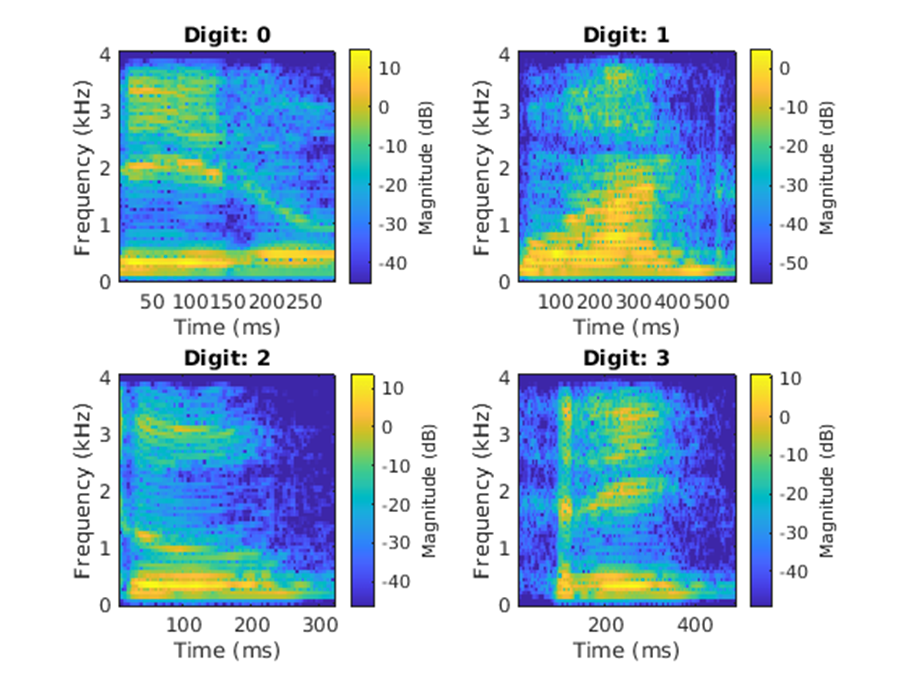

### frist of all let's create our owen data set (transform from speach to images)

In [ ]:

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
#input directory containing WAV files
#input_dir = 'C:/Users/Ahmed/AnacondaWorkSpace/drmohsen2/2- After Grouping and Filtering/Train'
#output directory to save spectrogram images
output_dir = 'C:/Users/Ahmed/AnacondaWorkSpace/drmohsen2/2- After Grouping and Filtering/Train images'
#create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#process each WAV file in input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.wav'):
        # load audio file
        filepath = os.path.join(input_dir, filename)
        y, sr = librosa.load(filepath)
        # create spectrogram
        spec = librosa.stft(y)
        spec_db = librosa.amplitude_to_db(abs(spec))
        # plot spectrogram
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar()
        plt.title('Spectrogram')
        plt.tight_layout()     
        # save spectrogram to file
        if filename.endswith('0.wav'):
            sup_folder="/0"
        if filename.endswith('1.wav'):
            sup_folder="/1"
        if filename.endswith('2.wav'):
            sup_folder="/2"
        if filename.endswith('3.wav'):
            sup_folder="/3"
        if filename.endswith('4.wav'):
            sup_folder="/4"
        if filename.endswith('5.wav'):
            sup_folder="/5"
        if filename.endswith('6.wav'):
            sup_folder="/6"
        if filename.endswith('7.wav'):
            sup_folder="/7"
        if filename.endswith('8.wav'):
            sup_folder="/8"
        if filename.endswith('9.wav'):
            sup_folder="/9"
        output_filename = os.path.splitext(filename)[0] + '.png'
        output_filepath = os.path.join(output_dir+sup_folder, output_filename)
        plt.savefig(output_filepath)        
        # close plot to save memory
        plt.close()


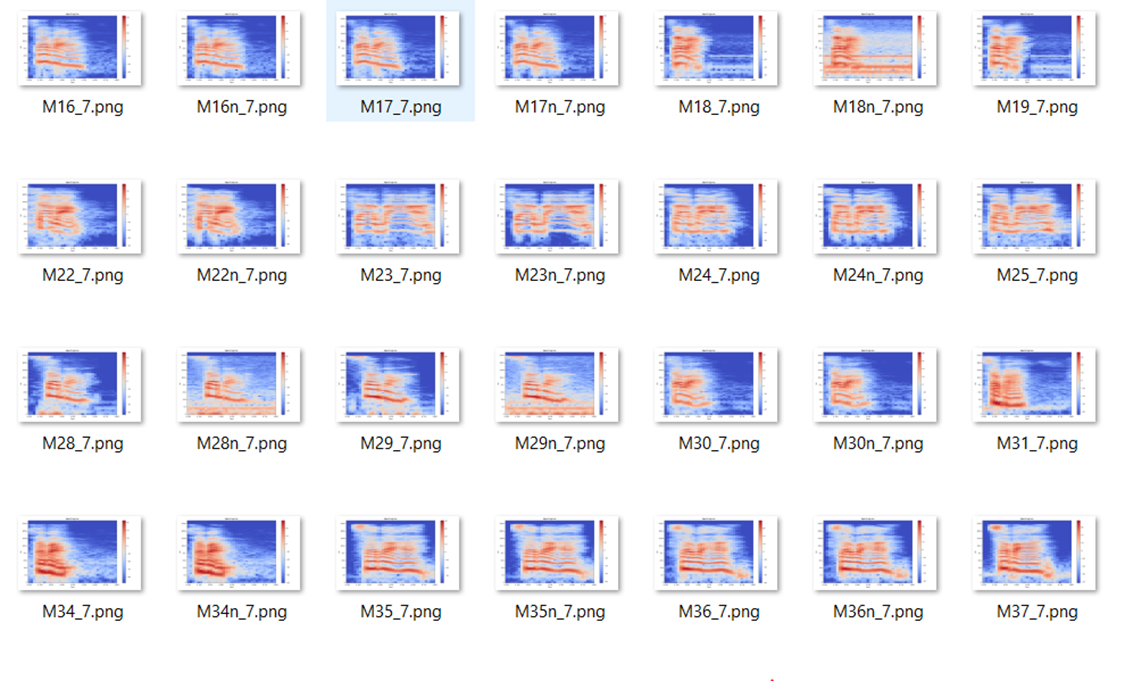

## to solve this poroblem i will use RES-net

In [267]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module |
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
from torchsummary import summary              # for getting the summary of our model
from PIL import Image as im
import cv2
import re
from torchsummary import summary 
from tqdm import tqdm  # For nice progress bar!


In [268]:
data_dir =  "C:/Users/Ahmed/AnacondaWorkSpace/drmohsen2/2- After Grouping and Filtering"
train_dir = data_dir + "/Train images"
valid_dir = data_dir + "/Test images"
digitits = os.listdir(train_dir)

In [269]:
# printing the disease names
print(digitits)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [270]:
print("Total disease classes are: {}".format(len(diseases)))
num_classes=len(digitits)

Total disease classes are: 10


In [271]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
0,148
1,120
2,120
3,120
4,120
5,120
6,120
7,120
8,120
9,120


In [272]:
import torchvision.transforms as T
image_size=256
transform = T.Resize((image_size,image_size))
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.Compose([
            transforms.Resize([224,224]), 
            transforms.ToTensor(),
        ]))
valid = ImageFolder(valid_dir, transform=transforms.Compose([
            transforms.Resize([224,224]),
            transforms.ToTensor(),
        ]))
img, label = train[3]
print(img.shape, label)

torch.Size([3, 224, 224]) 0


In [273]:
# Setting the seed value
random_seed =6
torch.manual_seed(random_seed)

In [274]:
# setting the batch size
batch_size = 16
learning_rate=0.001
num_epochs=80

In [275]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, pin_memory=True)

In [276]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: ',device)

device:  cuda


In [277]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True),
             #nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
             ]
    return nn.Sequential(*layers)

def pool_Block():
    layers = [
             nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
             ]
    return nn.Sequential(*layers)
class ResNet_4blocks(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.res1 = nn.Sequential(ConvBlock(64, 64), ConvBlock(64, 64))
        self.res2 = nn.Sequential(ConvBlock(64, 128), ConvBlock(128, 128))
        self.res3 = nn.Sequential(ConvBlock(128, 256), ConvBlock(256, 256))
        self.res4 = nn.Sequential(ConvBlock(256, 512), ConvBlock(512, 512))
        self.conv2=ConvBlock(64, 128)
        self.conv3=ConvBlock(128, 256)
        self.conv4=ConvBlock(256, 512)
        self.pool=pool_Block()
        self.classifier = nn.Sequential(
                                     nn.Flatten(),
                                       nn.Linear(512*14*14, num_classes))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.res1(out) + out
        out=self.pool(out)
        out = self.res2(out) + self.conv2(out)
        out=self.pool(out)
        out = self.res3(out) + self.conv3(out) 
        out=self.pool(out)
        out = self.res4(out) + self.conv4(out) 
        out=self.pool(out)
        out = self.classifier(out)
        return out 
model = ResNet_4blocks(3, 10).to(device=device)
model

ResNet_4blocks(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(12

In [278]:
# getting summary of the model
INPUT_SHAPE = (3, 224, 224)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
            Conv2d-7         [-1, 64, 224, 224]          36,928
       BatchNorm2d-8         [-1, 64, 224, 224]             128
              ReLU-9         [-1, 64, 224, 224]               0
        MaxPool2d-10         [-1, 64, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]          73,856
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
           Conv2d-14        [-1, 128, 1

In [279]:
#Loss and Optimizer

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

In [280]:
def check_accuracy(loader,model):
    num_correct=0
    num_samples=0
    model.eval()  # to turn off batch normalisation and dropout layers

    with torch.no_grad():  # to turn off backprobagation
        for x, y in tqdm(loader):
            x=x.to(device=device)
            #x=F.pad(input=x,pad=(2,2,2,2)).to(device=device) # make the image 32x32 dimension instead of 28x28

            y=torch.tensor(y).to(device=device)

            scores=model(x)
            _, predictions=scores.max(1)  #max return a tuple (max element, max element index)
            num_correct+= (predictions==y).sum()
            num_samples+= predictions.size(0)
        #print('accuracy=',((float(num_correct)/num_samples)*100) )

    model.train()   # to return model back to training mode
    return (float(num_correct)/num_samples)*100

In [282]:
# Train Network
num_epochs=3
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs} ')
    for batch_idx, (data,targets) in enumerate(tqdm(train_dl)):

        #getting the data
        data=data.to(device=device)
        targets=targets.to(device=device)
        # data is the batch of data, targets is the target label of each sample in the batch


        #forward
        scores=model(data)
        loss=criterion(scores,targets)
        
        torch.set_grad_enabled(True)  # Context-manager 

        #backward
        optimizer.zero_grad()
        loss.backward()

        #gradient descent -- Adam
        optimizer.step()
    print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

epoch: 1/3 


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11216\2298648362.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y).to(device=device)
100%|██████████| 19/19 [00:05<00:00,  3.31it/s]


validation accuracy= 93.33333333333333
epoch: 2/3 


100%|██████████| 19/19 [00:05<00:00,  3.18it/s]


validation accuracy= 93.33333333333333
epoch: 3/3 


100%|██████████| 19/19 [00:05<00:00,  3.69it/s]

validation accuracy= 93.33333333333333


#           <font color=orange>  comments: </font>

we could reach a  geat test accurecy of 93.33333333333333 just by using 4 resnet blocks

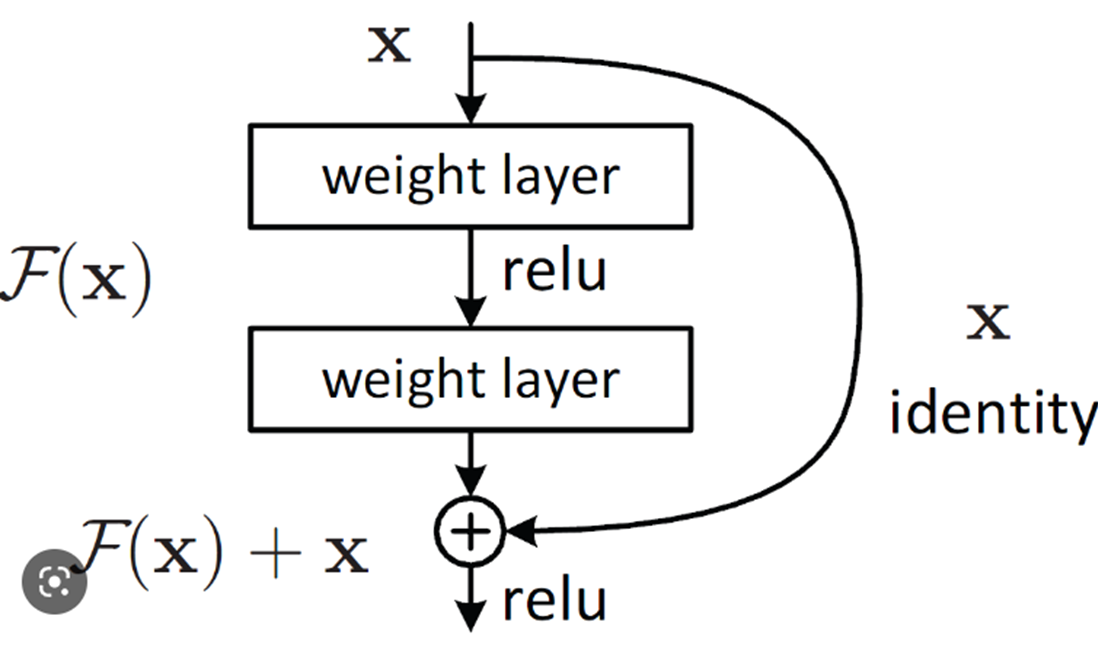

'--allow-chromium-download' is not recognized as an internal or external command,
operable program or batch file.
